In [6]:
import pandas as pd

### 그래프에 한글 처리하기

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
plt.rcParams['font.size']

10.0

In [10]:
plt.rcParams['font.family']

['sans-serif']

In [11]:
rc_s = pd.Series(plt.rcParams)

In [12]:
rc_s.shape

(286,)

In [13]:
import sys

In [14]:
sys.platform

'win32'

In [15]:
import matplotlib.font_manager as fm

In [16]:
#두개의 운영체제인 윈도우와 맥에서 한글 글꼴을 관리
if sys.platform == 'win32' :
    font_path = 'C:/Windows/Fonts/HANBatang.ttf'
    fontprop = fm.FontProperties(fname=font_path, size=18)
    
    path_pen = 'C:/Windows/Fonts/malgunbd.ttf'
    fontprop1 = fm.FontProperties(fname=path_pen, size=18)

In [17]:
if sys.platform == 'darwin'  :
    path = '/Users/plusjune/Library/Fonts/NanumMyeongjo.ttf'
    fontprop = fm.FontProperties(fname=path, size=18)
    path_pen = '/Users/plusjune/Library/Fonts/NanumPen.ttf'
    fontprop1 = fm.FontProperties(fname=path_pen, size=34)

In [18]:
plt.rcParams['font.family'] #현재 작동되는 문자의 글꼴이 저장됨

['sans-serif']

In [19]:
if sys.platform == 'win32' :
    from matplotlib import font_manager, rc
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [20]:
plt.rcParams['font.family']

['Malgun Gothic']

In [21]:
#임의의 데이터 50개 생성

In [22]:
import numpy as np

In [23]:
data = np.random.randint(1000, 6000, 50)

In [24]:
data

array([1214, 4264, 5598, 3978, 3144, 1928, 1614, 2326, 3731, 2638, 1640,
       3376, 1862, 5862, 4939, 2762, 4793, 2114, 3813, 1530, 3576, 3497,
       2353, 5171, 5617, 4391, 3547, 3700, 1132, 1831, 2836, 3420, 1906,
       2392, 4134, 3075, 2190, 1810, 4936, 3204, 5287, 4575, 2461, 2022,
       1693, 1610, 2407, 3878, 5233, 3591])

In [25]:
import matplotlib.pyplot as plt

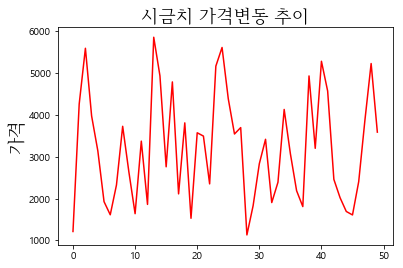

In [26]:
plt.ylabel('가격', fontproperties=fontprop)
plt.title('시금치 가격변동 추이', fontproperties=fontprop)
plt.plot(range(50), data, 'r')
plt.show()

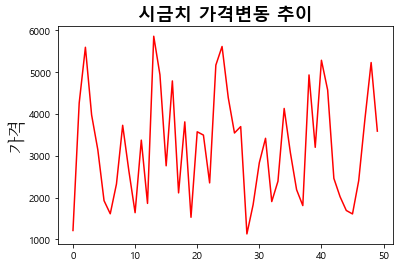

In [27]:
plt.plot(range(50), data, 'r')
plt.ylabel('가격', fontproperties=fontprop)
plt.title('시금치 가격변동 추이', fontproperties=fontprop1)
plt.show()

###  plot 그래프 그리기

In [28]:
#1000개의 데이터를 임의의 값으로 세팅하고 인덱스를 날짜로 만듬
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2016', periods=1000))

In [29]:
#특정일자를 기준으로 1000일간의 기간을 지정해서 시계열 데이터를 생성하는데,
#만들어진 시리즈의 값을 .cumsum을 통해 누적값으로 변경
ts = ts.cumsum()

In [30]:
ts.head()

2016-01-01    0.357906
2016-01-02   -0.428926
2016-01-03   -1.097500
2016-01-04   -0.274268
2016-01-05    0.144670
Freq: D, dtype: float64

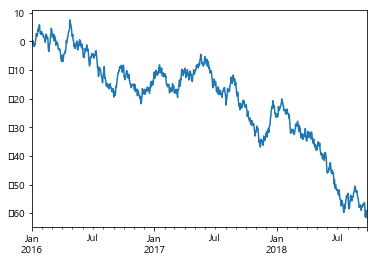

In [32]:
ts.plot()
plt.show()

In [33]:
ts.plot

In [34]:
#SeriesPlotMethods클래스의 객체임. 이 객체에 어떤 정보가 있는 확인해보자
for i in dir(ts.plot) :
    if not i.startswith("_") :
        print(i, end=",  ")

area,  bar,  barh,  box,  density,  hist,  kde,  line,  pie,  

In [35]:
ts.plot.line #.line도 메소드 객체임. 메소드는 내부에 함수를 가지고 있으므로, 

<bound method SeriesPlotMethods.line of <pandas.plotting._core.SeriesPlotMethods object at 0x000002A944EF5F98>>

In [36]:
#__func__를 조회해서 내부의 함수를 확인할 수 있음
ts.plot.line.__func__

<function pandas.plotting._core.SeriesPlotMethods.line>

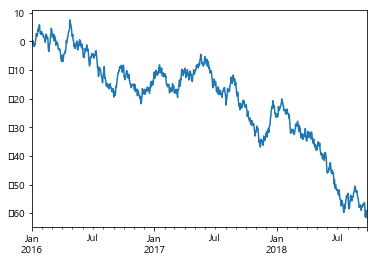

In [37]:
ts.plot.line()

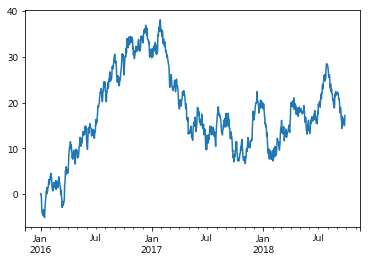

In [31]:
ts.plot(kind='line')

In [38]:
#.index의 속성을 확인하면 DatetimeIndex객체가 만들어짐. 주기가 D인것은 일 단위 
ts.index[:10]

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [44]:
#이 인덱스를 가지고 데이터 프레임을 만들자. 이번에는 colums 속성에 한글을 넣자
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index, 
                  columns=list('가나다라'))

In [45]:
df = df.cumsum()

In [46]:
df.head()

,가,나,다,라
2016-01-01,1.396636,0.232645,-0.186635,0.680475
2016-01-02,0.659544,0.901958,0.896581,1.877699
2016-01-03,0.293634,0.144888,1.484028,1.996309
2016-01-04,-0.920189,-1.841460,0.250858,2.450651
2016-01-05,-1.159594,-2.939316,0.770569,1.576226


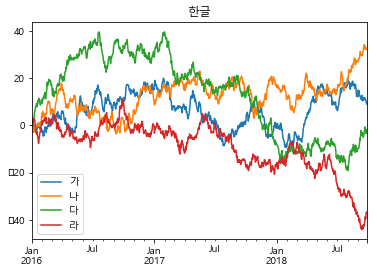

In [47]:
df.plot(title="한글")
plt.show()

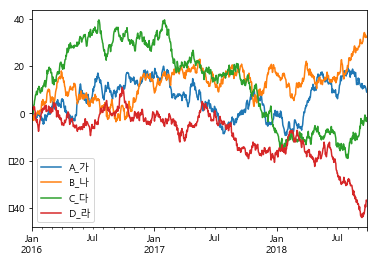

In [51]:
df.plot.line().legend(['A_가','B_나','C_다','D_라']) #라인 메소드 내부의 legend메소드로 범례에 들어갈 이름 4개지정

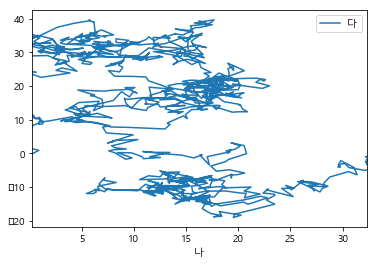

In [54]:
df.plot(x='나', y=['다']) #데이터프레임의 특정열만을 이용해서 그래프를 그리려면 축에 대한 정보를 지정해서 그릴수 있음. 

In [56]:
#한글을 표시하면 마이너스 기호가 제대로 표시되지 않음. 
#마이너스 기호를 표시하려면 추가로 속성정보를 갱신해야함
plt.rcParams['axes.unicode_minus'] = False #한글일때도 마이너스가 처리되도록 하는 코드

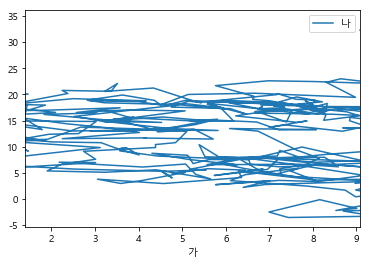

In [57]:
df.plot(x='가', y=['나'])

- 판다스와 matplotlib그래프 틀을 직접 지정해서 사용하려면 .plot안의 ax매개변수에 .subplot함수에서 만들어진 변수를 할당해야함

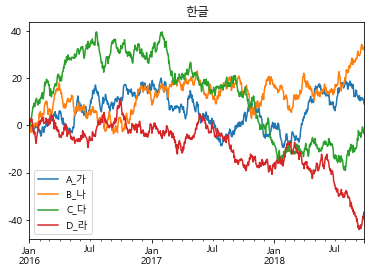

In [58]:
fig, ax = plt.subplots()

ax = df.plot(title="한글",kind='line',ax=ax).legend(['A_가','B_나','C_다','D_라'])

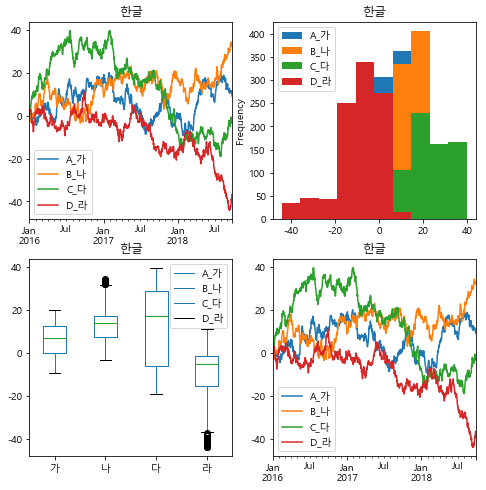

In [59]:
#2행2열
fig, axes = plt.subplots(2,2,figsize=(8,8))
axes[0,0] = df.plot(title="한글",kind='line',ax=axes[0,0]).legend(['A_가','B_나','C_다','D_라'])
axes[0,1] = df.plot(title="한글",kind='hist',ax=axes[0,1]).legend(['A_가','B_나','C_다','D_라'])
axes[1,0] = df.plot(title="한글",kind='box',ax=axes[1,0]).legend(['A_가','B_나','C_다','D_라'])
axes[1,1] = df.plot(title="한글",kind='line',ax=axes[1,1]).legend(['A_가','B_나','C_다','D_라'])

###  복잡한 plot 그래프 그리기

In [60]:
import numpy as np

In [62]:
ser = pd.Series(np.random.randn(10000)) #넘파이 모듈이 정규분포 데이터를 생성하는 randn메소드를 이용함

In [63]:
plt.rcParams['axes.unicode_minus'] = False

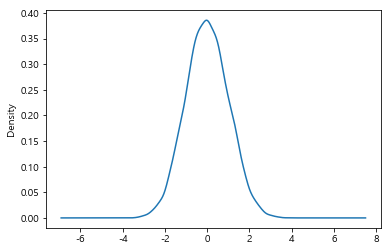

In [65]:
ser.plot.kde() #대칭적인 그래프 그리기

In [66]:
ser1 = pd.Series(np.random.rand(10000)) #.rand메소드로 균등분포(uniform distribution)의 시리즈 생성

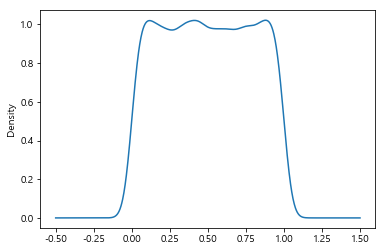

In [67]:
ser1.plot.kde()

In [68]:
import seaborn as sns

In [69]:
df = sns.load_dataset('iris')

In [70]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


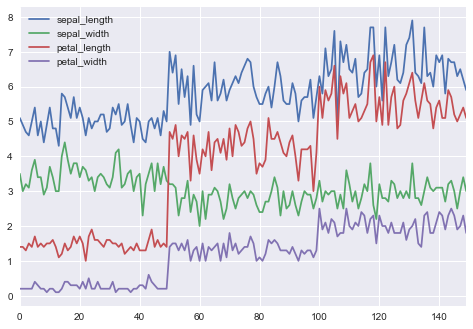

In [72]:
df.plot() #숫자 자료형값으로만 그래프를 그림

In [73]:
df.species.value_counts() #species열이 어떤 값들로 구성되어 있는지 .value_counts()로 확인

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [74]:
from pandas.plotting import andrews_curves #범주별로 여러개의 선 그래프가 그려짐. 특징: 고차원 데이터를 곡선이나 직선의 형태로 나타냄

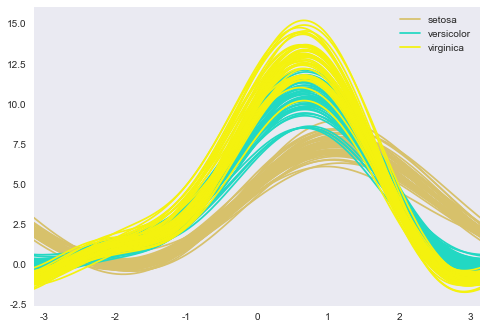

In [75]:
andrews_curves(df, 'species')

In [76]:
from pandas.plotting import parallel_coordinates
#다차원의 항목을 x축에 배치하고 각 항목의 모든 측정치를 Y값에 배치한뒤 관측치별로 데이터 포인트를 연결한 그래프

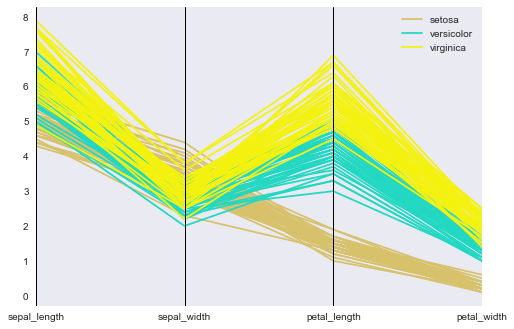

In [77]:
parallel_coordinates(df, 'species')

###  점 그래프 그리기

In [82]:
import seaborn as sns

In [83]:
df_a = sns.load_dataset('tips')

In [84]:
df_a.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


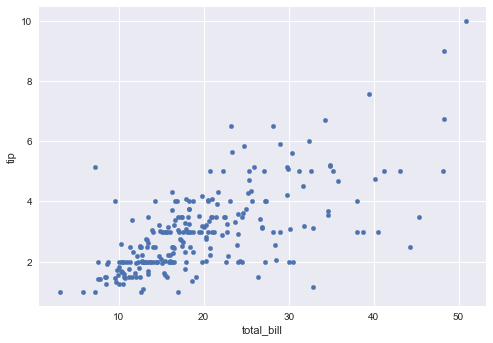

In [85]:
df_a.plot.scatter('total_bill','tip') #두개의 열정보를 전달해서 그래프를 생성

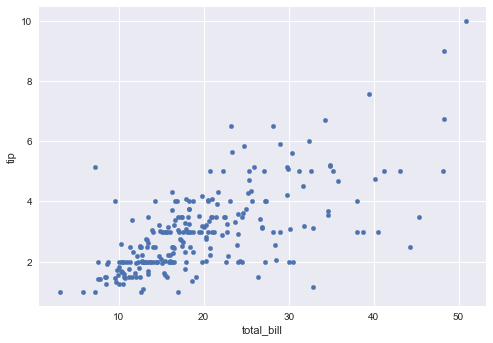

In [86]:
df_a.plot(kind='scatter',x='total_bill',y='tip')

In [87]:
from pandas.plotting import radviz #다중데이터를 시각화
#평면에 여러개의 점을 설정하고 단위 원에 똑같이 간격을 두고 있으며
#각점은 단일속성을 나타냄

In [88]:
df_i = sns.load_dataset('iris')

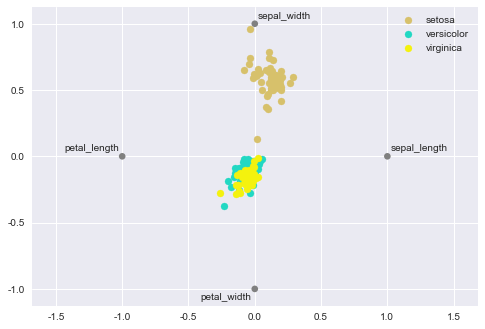

In [89]:
radviz(df_i, 'species')

### 히스토그램 그래프 그리기
- 특정 데이터들이 발생한 빈도가 정규분포를 따르는지를 알아볼 수 있음

In [92]:
import numpy as np

In [93]:
mu = 100
sigma = 10

In [94]:
np.random.seed(0) #임의적인 데이터를 생성할 때 같은 값이 유지되어야 검증할때 비교가 가능함

#평균값과 표준편차를 정하고 정규분포를 이용해 무작위로 데이터를 생성
x = np.random.normal(mu,sigma,10000)

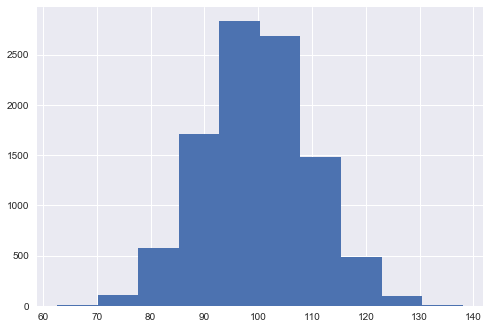

In [95]:
fig = plt.figure() #그래프의 공간 만들기

ax = fig.add_subplot(111) #이 내부에 그래프가 위치할 곳 지정
ax.hist(x)

plt.show()

In [96]:
import seaborn as sns

In [97]:
df_a = sns.load_dataset('tips')

In [98]:
df_a.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


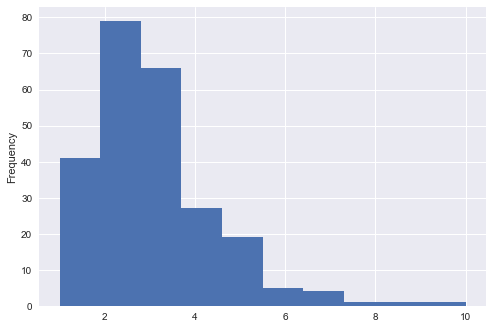

In [99]:
df_a['tip'].plot(kind='hist')

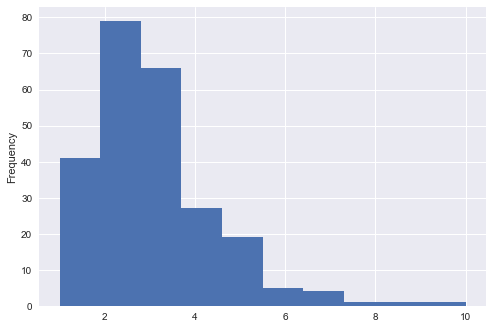

In [100]:
df_a['tip'].plot.hist()

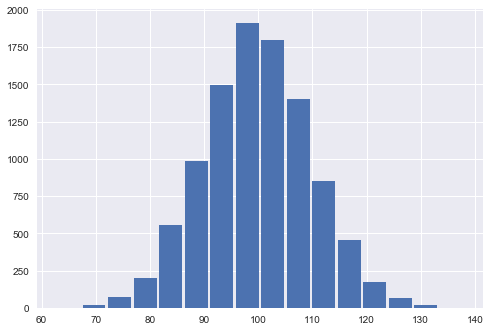

In [101]:
#막대에 대한 수치를 어떻게 부여할지? 데이터를 그룹화하는 기준임. 
fig = plt.figure()

ax = fig.add_subplot(111)
ax.hist(x, rwidth=0.9, bins=16) #bins에 수치를 넣고, 막대의 폭은 rwidth인자에 소숫점으로

plt.show()

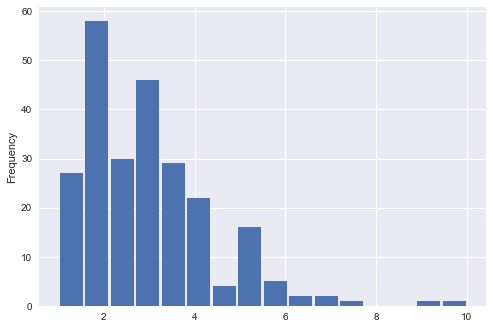

In [103]:
df_a['tip'].plot(kind='hist',bins=16, rwidth=0.9)

In [104]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
              'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

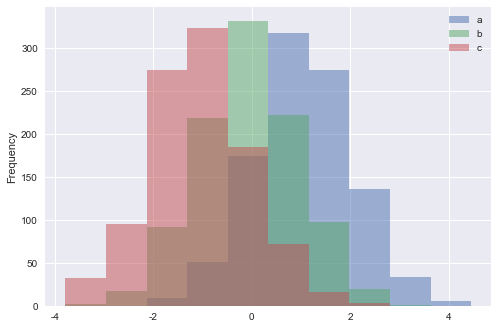

In [105]:
df4.plot.hist(alpha=0.5) #투명도를 높여 막대의 색이 옅어짐

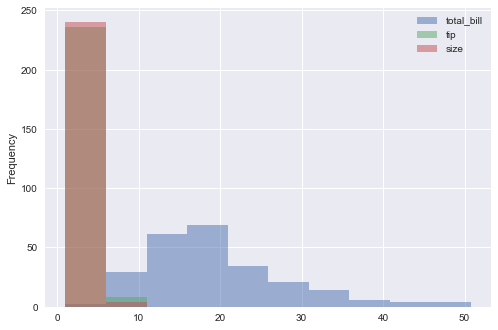

In [106]:
df_a.plot.hist(alpha=0.5)

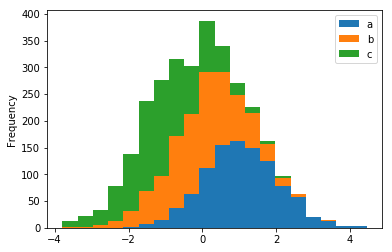

In [29]:
df4.plot.hist(stacked=True, bins=20) #각 항목의 구분이 명확하지 않을때 

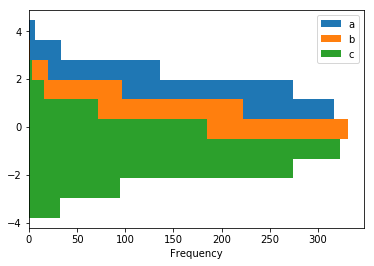

In [30]:
df4.plot.hist(orientation='horizontal') #수평으로 보고 싶을때

In [108]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2016', periods=1000))

In [109]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index, 
                  columns=list('ABCD'))

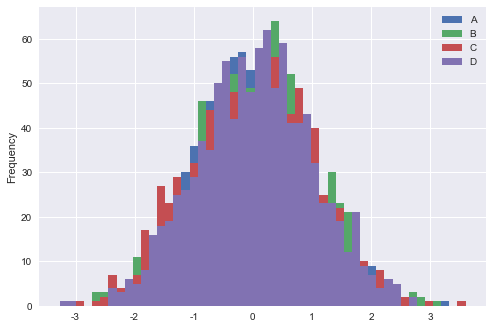

In [110]:
df.plot.hist(bins=50) #막대를 bins50으로 그룹화하고 히스토그램 실행

In [111]:
df['A'].head()

2016-01-01   -0.706413
2016-01-02    0.465122
2016-01-03   -2.678413
2016-01-04   -0.015170
2016-01-05    0.975021
Freq: D, Name: A, dtype: float64

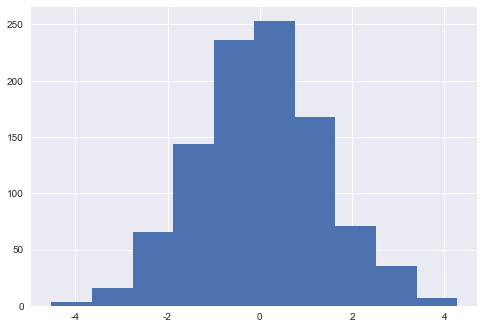

In [112]:
df['A'].diff().hist() #.diff메소드를 이용해 값을 계산하면 실제 각행의 값의 차를 계산

In [113]:
df.diff().head()

,A,B,C,D
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,1.171535,-0.068667,-1.760642,-1.443059
2016-01-03,-3.143535,0.736521,-0.080661,-1.116249
2016-01-04,2.663243,-1.247057,0.972963,0.673785
2016-01-05,0.990191,-1.144344,-0.271189,-1.461556


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A94B175F60>,
      dtype=object)

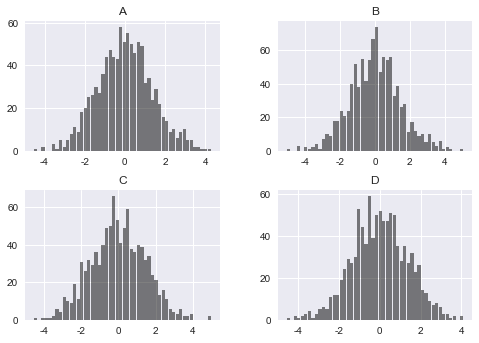

In [114]:
df.diff().hist(rwidth=0.9, color='k', alpha=0.5, bins=50)

### 실제 데이터의 범위 와 타이틀 세팅

   . hist 메소드 내의 range에 범위 지정
   . set_title 로 그래프 제목 지정 

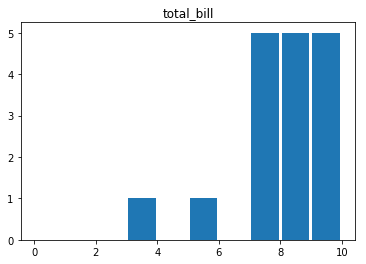

In [41]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.hist(df_a['total_bill'],range=(0,10), rwidth=0.9)
ax.set_title('total_bill')

plt.show()

####  타이틀을 표시하기

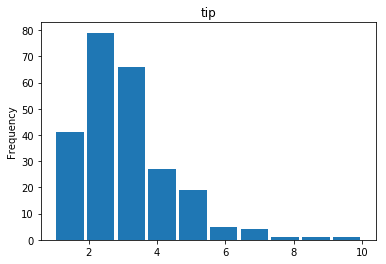

In [42]:
df_a['tip'].plot(kind='hist',bins=10, rwidth=0.9, title='tip')

### 파이 그래프 그리기


In [115]:
import numpy as np

In [118]:
data = np.linspace(0,10,30).reshape(10,3) #0과 10사이의 원소 30개 생성. 
#만들어진 1차원배열을 reshape메소드를 통해 10행 3열인 2차원 형태의 배열로 변환하여 총 10개의 index생성
index= ['a','b','c','d','e','f','g','h','i','j']

In [119]:
data

array([[ 0.        ,  0.34482759,  0.68965517],
       [ 1.03448276,  1.37931034,  1.72413793],
       [ 2.06896552,  2.4137931 ,  2.75862069],
       [ 3.10344828,  3.44827586,  3.79310345],
       [ 4.13793103,  4.48275862,  4.82758621],
       [ 5.17241379,  5.51724138,  5.86206897],
       [ 6.20689655,  6.55172414,  6.89655172],
       [ 7.24137931,  7.5862069 ,  7.93103448],
       [ 8.27586207,  8.62068966,  8.96551724],
       [ 9.31034483,  9.65517241, 10.        ]])

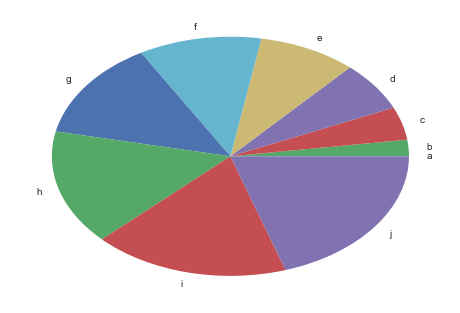

In [121]:
plt.pie(data[:,0],labels=index) #첫번째 열에 대한 그래프
plt.show()

In [123]:
from matplotlib.pyplot import pie, axis, show
#두개의 열을 가진 데이터 프레임
df = pd.DataFrame({
    'Sex': ['female', 'male', 'female'],
    'Smoke': [1, 1, 1]})

In [124]:
sums = df.Smoke.groupby(df.Sex).sum()
print(sums)

Sex
female    2
male      1
Name: Smoke, dtype: int64


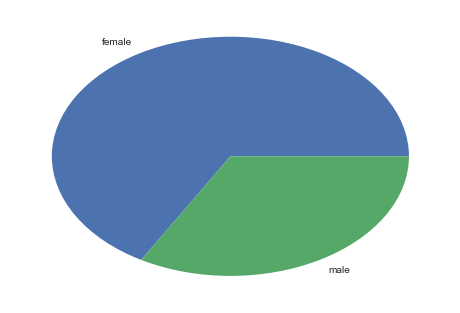

In [125]:
axis('normal')
pie(sums, labels=sums.index)
show()

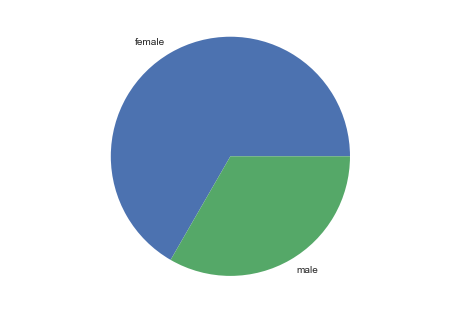

In [127]:
axis('equal') #같은 간격을 유지
pie(sums, labels=sums.index)
show()

In [128]:
import seaborn as sns

In [129]:
df_a = sns.load_dataset('tips')

In [130]:
df_a.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [131]:
ser = df_a['time']

In [132]:
ser.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

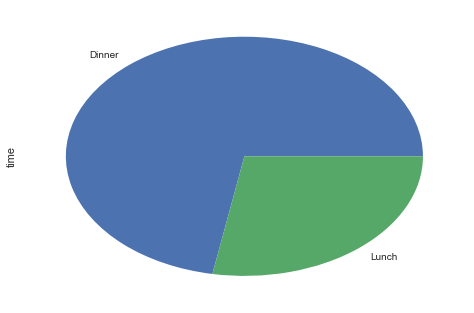

In [133]:
ser.value_counts().plot(kind='pie', labels=ser.value_counts().index)
plt.show()

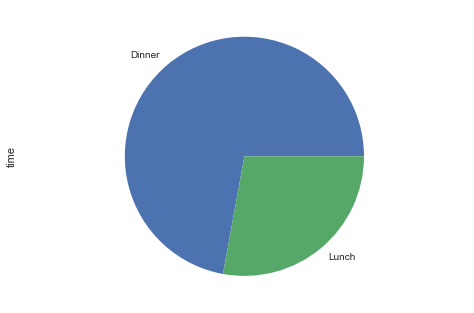

In [134]:
axis('equal')
ser.value_counts().plot.pie(labels=ser.value_counts().index)
plt.show()

###  상자 그래프 그리기
- 제1사분위, 제2사분위, 제3사분위, 최댓값등을 표시할수 있는 그래프
- 히스토그램과는 달리 여러내용을 한 그래프에 표시할 수 있음

In [148]:
import numpy as np

In [149]:
df_b = pd.DataFrame(np.random.random((6,10)))

In [150]:
df_b.head()

,0,1,2,3,4,5,6,7,8,9
0,0.094372,0.393898,0.126870,0.862557,0.882353,0.903936,0.022009,0.832770,0.382365,0.176537
1,0.234191,0.467845,0.291657,0.867984,0.123773,0.574166,0.322482,0.117492,0.221788,0.616446
2,0.799744,0.607340,0.576599,0.455167,0.486521,0.312417,0.549352,0.647660,0.502826,0.148342
3,0.791625,0.823697,0.839015,0.277032,0.771210,0.705545,0.343098,0.817347,0.611323,0.648452
4,0.344034,0.231689,0.871085,0.201109,0.517359,0.019874,0.277103,0.011751,0.054768,0.344448


In [151]:
df_b.max()

0    0.799744
1    0.823697
2    0.871085
3    0.867984
4    0.971411
5    0.903936
6    0.986637
7    0.832770
8    0.611323
9    0.648452
dtype: float64

In [152]:
df_b.min()

0    0.094372
1    0.231689
2    0.126870
3    0.059407
4    0.123773
5    0.019874
6    0.022009
7    0.011751
8    0.054768
9    0.148342
dtype: float64

In [153]:
df_b.quantile([0.25, 0.5,0.75]) #사분위의 값을 구하자

,0,1,2,3,4,5,6,7,8,9
0.25,0.261652,0.412385,0.362893,0.22009,0.494230,0.377855,0.288448,0.090900,0.120996,0.218515
0.50,0.447540,0.537593,0.690238,0.36610,0.644284,0.639855,0.332790,0.382576,0.302077,0.423930
0.75,0.731480,0.749545,0.830231,0.76071,0.854567,0.743323,0.497789,0.774926,0.472711,0.588187


In [154]:
df_c = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

In [155]:
df_c.head()

,A,B,C,D,E
0,0.400514,0.962949,0.303326,0.353425,0.015243
1,0.913452,0.742083,0.242328,0.462816,0.126136
2,0.142220,0.685680,0.422238,0.589039,0.014869
3,0.454097,0.243577,0.592328,0.253932,0.057787
4,0.239608,0.017527,0.187082,0.713712,0.855787


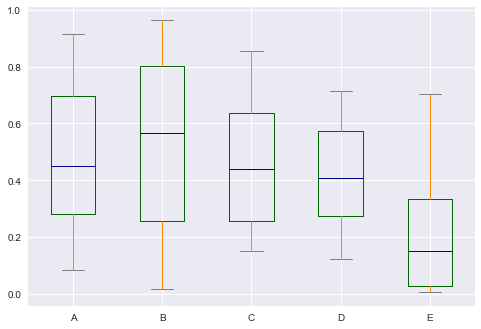

In [158]:
df_c.plot.box(color=color, sym='r+')

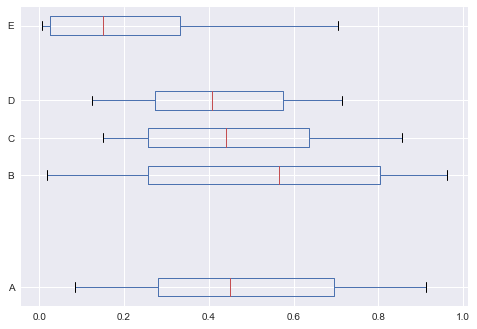

In [159]:
df_c.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

###  막대 그래프 그리기

In [161]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

In [162]:
df2.head()

,a,b,c,d
0,0.397961,0.110478,0.192234,0.793176
1,0.962280,0.535859,0.669575,0.538019
2,0.232236,0.850422,0.868739,0.263661
3,0.436978,0.019884,0.484391,0.926165
4,0.101587,0.220104,0.763616,0.153124


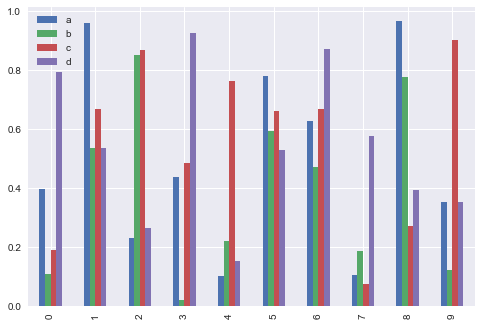

In [163]:
df2.plot.bar()

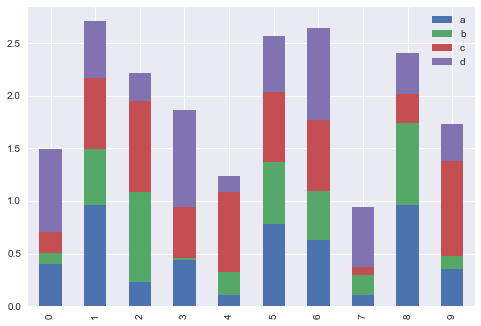

In [164]:
df2.plot.bar(stacked=True) #stack처리하면 막대그래프위에 막대그래프가 계속 그려짐

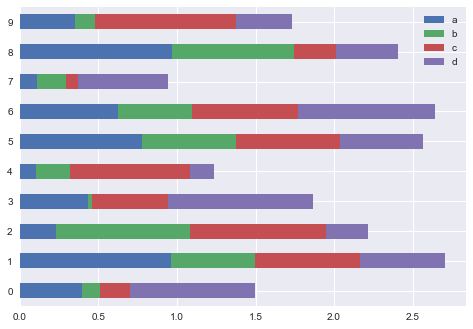

In [165]:
df2.plot.barh(stacked=True)

In [166]:
df_a.iloc[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


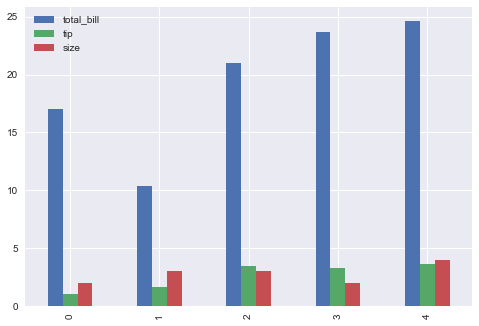

In [167]:
df_a.iloc[:5].plot(kind='bar') #5개의 행을 조회

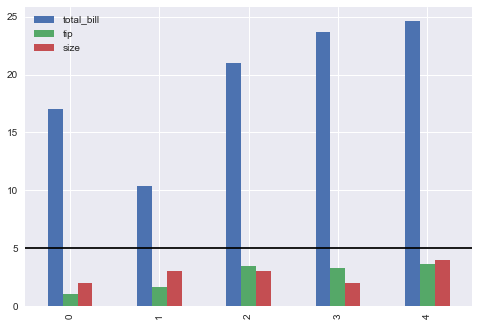

In [169]:
df_a.iloc[:5].plot.bar()
plt.axhline(5, color='k') #특정기준을 막대그래프로 지정하려면 matplotlib에 있는 axhline을 그래프로 첨가할 수 있음